In [84]:
import tensorflow as tf
import os 

In [85]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [86]:
data_dir = 'data'

In [87]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [88]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in extension list{}'.format(image.path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}', format(image_path))

In [89]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 384 files belonging to 2 classes.


In [90]:
data_iterator = data.as_numpy_iterator()

In [91]:
batch = data_iterator.next()

In [92]:
# Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [93]:
# class 1 = Sad
# class 0 = Happy
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

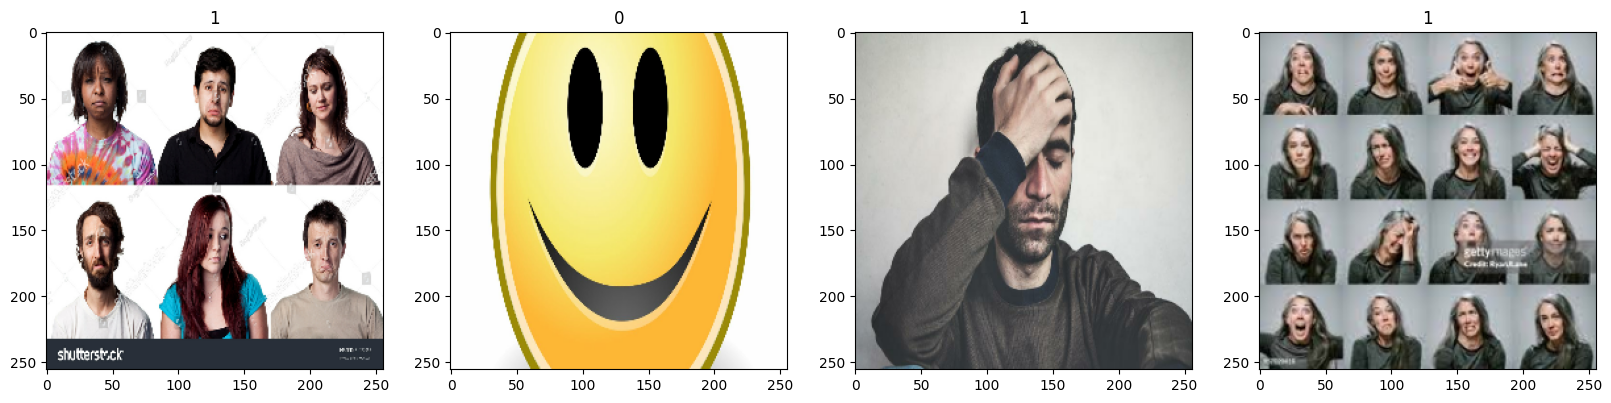

In [94]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### Preprocessing Data

In [95]:
data = data.map(lambda x, y: (x/255, y))

In [106]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.05098039, 0.4627451 , 0.6784314 ],
          [0.05098

#### Split data

In [107]:
len(data)

12

In [116]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [121]:
train = data.take(train_size) 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [124]:
len(train)

8

### Build Deep Learning Model

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [128]:
model = Sequential()

In [130]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape= (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [135]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

### Train Model

In [136]:
logdir = 'logs'

In [137]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [138]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 14s 1s/step - loss: 1.5856 - accuracy: 0.5000 - val_loss: 0.6708 - val_accuracy: 0.6562
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 0.6983 - accuracy: 0.5898 - val_loss: 0.5915 - val_accuracy: 0.6094
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.6207 - accuracy: 0.6172 - val_loss: 0.5737 - val_accuracy: 0.8438
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 0.5603 - accuracy: 0.6836 - val_loss: 0.5624 - val_accuracy: 0.7344
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.5235 - accuracy: 0.7891 - val_loss: 0.4332 - val_accuracy: 0.8594
Epoch 6/20
8/8 [==============================] - 11s 1s/step - loss: 0.4374 - accuracy: 0.8320 - val_loss: 0.4028 - val_accuracy: 0.8438
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.3493 - accuracy: 0.8516 - val_loss: 0.4278 - val_accuracy: 0.8438
Epoch 8/20
8/8 [==================

### Plot Performance

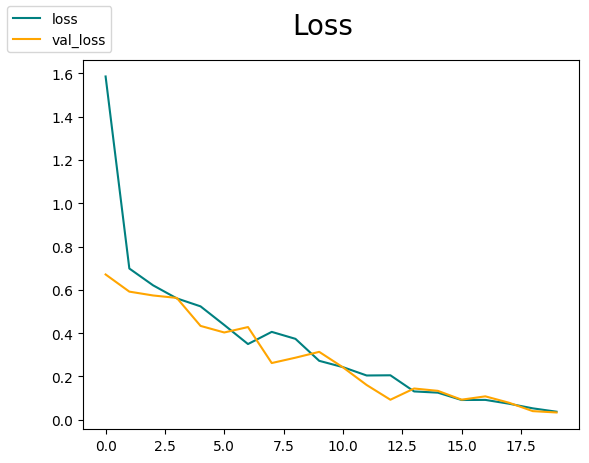

In [139]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
fig.legend(loc = 'upper left')
plt.show()

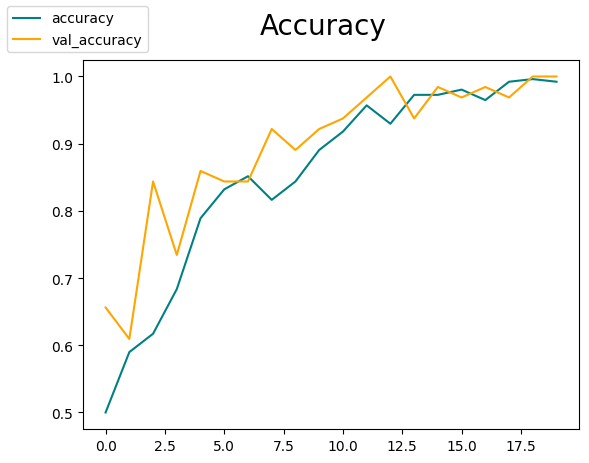

In [140]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
fig.legend(loc = 'upper left')
plt.show()

### Predict

In [141]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [142]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [143]:
for batch in test.as_numpy_iterator():
    X,y = batch
    y_pred = model.predict(X)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 238ms/step


In [144]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy: 1.0


### Test

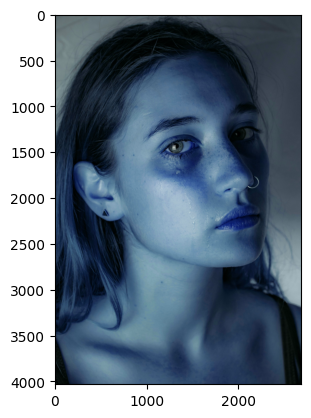

In [158]:
img = cv2.imread("Sad2.jpg")
plt.imshow(img)
plt.show()

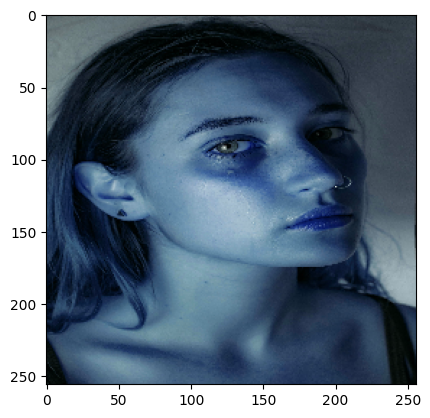

In [159]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [160]:
test_new = model.predict(np.expand_dims(resize/255, 0))
test_new

1/1 [==============================] - 0s 43ms/step


array([[0.9901359]], dtype=float32)

In [161]:
if test_new> 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### Save the model

In [162]:
from tensorflow.keras.models import load_model

In [163]:
model.save(os.path.join('models', 'HappySadModel.h5'))

c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [164]:
new_model = load_model(os.path.join('models', 'HappySadModel.h5'))

In [165]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 144ms/step


array([[0.9901359]], dtype=float32)